# <h1 style="color:red">SAÉ22 SIGNAL PARTIE SIMULATION :</h1>

<img src="https://i.imgur.com/9ocfZTX.png">

# <h1 style="color:red">INTRODUCTION :</h1>

La <strong>translation de fréquence</strong> est une opération fondamentale pour les transmissions hertziennes. </br>
Elle consiste à translater le spectre d'un signal, sans en altérer le contenu, soit vers une fréquence plus élevée au niveau de l’émetteur (<strong>up conversion</strong>) afin de le transmettre dans la bande de fréquences qui lui est dédiée (par exemple 2,4GHz pour le Wifi), soit vers une fréquence plus basse (<strong>down conversion</strong>) au niveau du récepteur pour remettre le signal dans sa bande de fréquences initiale.

</br>
La translation de fréquence est réalisée en multipliant le signal à transmettre par un signal sinusoïdal. 
Dans le cas particulier ou le signal à transmettre est un signal analogique, on parle de <strong>modulation AM</strong> « Amplitude modulation » car l’amplitude de 
la sinusoïde est modulée par celle du signal analogique.

# <h1 style="color:red">Mission de la SAÉ :</h1>

Cette SAE nous propose d’effectuer la transmission d’un signal audio modulé AM entre 2 PC relié via les cartes son puis de le démoduler, comme illustré sur le schéma ci-dessous :

<img src="https://i.imgur.com/LIn2N8E.png">

###  <span style="color:red">Pour cette SAE nous aurons besoins de Python et de ses librairies :</span> 

- Python :
    - Numpy
    - Matplotlib
    - Scipy

### <span style="color:red">Python : </span> 
`Python` est un langage de programmation. </br>
Il favorise la programmation structurée, fonctionnelle et orientée **objet** (la programmation orientée objet permet aux objets de communiquer entre eux).

- Il est doté d'un typage **dynamique fort** (il garantit que les types de données employés décrivent correctement les données manipulées)
- D'une **gestion automatique** de la mémoire par **ramasse-miettes** (sous-système informatique de gestion automatique de la mémoire) 
- D'un système de gestion d'exceptions (permet de gérer les conditions exceptionnelles pendant l'exécution du programme).



<img src="http://zencart-france.com/wp-content/uploads/2019/06/langage-de-programmation-python.jpg" align=center style="width: 350px;">

### <span style="color:red">Bibliothèque Numpy : </span> 
`NumPy` est une bibliothèque Python utilisée pour travailler avec des tableaux. </br>
Ce qui est bien avec cette bibliothèque, c'est le fait que le temps d'éxecution est beaucoup plus rapide car il travaille avec des vecteurs.</br> 

<img src="https://www.analyticslane.com/wp-content/uploads/2020/10/numpy.png" align=center style="width: 200px;">

### <span style="color:red">Bibliothèque Matplotlib : </span> 
`Matplotlib` est une bibliothèque de visualisation de données qui va nous permettre de faire des graphiques et des figures en 2D. </br>
Elle est construite sur des tableaux `NumPy` et est conçue pour fonctionner avec la pile `SciPy` (qui est utilisée pour le calcul scientifique et l'informatique technique).</br>
Elle nous permet d’accéder visuellement à d’**énormes** quantités de données dans des visuels plutot intuitifs. </br>

`Matplotlib` se compose de plusieurs tracés comme la ligne, la barre, la dispersion, l’histogramme, etc.</br>
Nous en aurons besoins pour faire les tracés de nos **fft, densité spectrale etc**.

<img src="http://scriptverse.academy/img/tutorials/matplotlib.png" align=center style="width: 200px;">

### <span style="color:red">Bibliothèque Scipy : </span> 
`Scipy` est une bibliothèque Python a usage scientifique notamment mathématiques très utilisée en ingénierie, open source sous licence BSD.</br>
La bibliothèque SciPy dépend de NumPy, qui fournit une manipulation des tableaux à N dimensions pratique et rapide.</br> 

Cela va nous permettre d'appliquer des **filtres** sur nos signaux.

<img src="https://www.fullstackpython.com/img/logos/scipy.png" align=center style="width: 200px;">

<img src="http://www.theatre2lacte-lering.com/theatre2lacte/wp-content/uploads/2015/02/les-objectifs-800x200.png" align=center style="width: 500px;"> 


### <span style="color:darkgreen">Chapitre 1 : Émetteur AM en simulation et début du récepteur</span>

- Visualiser une tranche du signal audio importé et sa FFT et en déduire la largeur de bande du signal.

- Préciser la fréquence d’échantillonnage du signal audio, le nombre de bits de codage et le nombre de niveau de quantification.

- Modulation et translation de fréquence

- Programme pour créer le signal modulé AM ainsi que la densité spectrale de puissance en dBm

- Equation mathématique du signal correspondant et faire sa transformée de Fourier 


### <span style="color:darkgreen">Chapitre 2 : Récepteur AM en simulation</span>

- Création du programme du signal re-translater et sa densité spectrale

- Opération pour récupérer le spectre du signal audio de départ

- Créer le programme avec Python et Scipy


# <font color="red"> I. Émetteur AM en simulation et début du récepteur</font>

### Commençons par charger le signal audio avec la librairie soundfile, puis visualisons une tranche de ce signal et sa FFT et en déduire la largeur de bande du signal.


Commençons par importer soundfile :

In [23]:
import soundfile as sf #Importation de la librairie soundfile
data, fe = sf.read("NR2.wav") #On récupère le contenu du fichier audio NR2.wav

sf.write("sae.wav", data, fe) #On enregistre dans un nouveau fichier le contenu de l'audio NR2

Nous avons bien enregistrer dans un nouveau fichier le contenu de NR2 pour pouvoir y visualiser une tranche de ce signal et sa FFT :

<img src="https://i.imgur.com/4tiz0vU.png">

<strong>Désormais, nous allons visualiser une tranche de ce signal entre la 10ème et 12ème seconde :</strong>

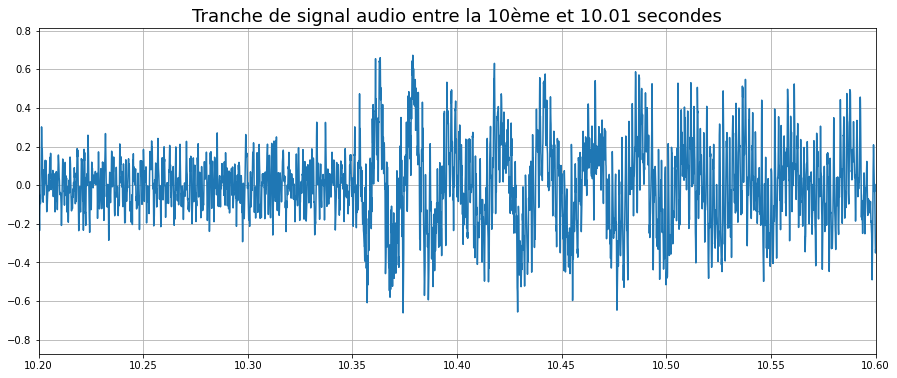

In [2]:
import matplotlib.pyplot as plt
import numpy as np

temps = np.arange(10, 12, 1/fe) #intervalle de la 10ème a la 12ème seconde par pas de 1/fe
intervalle = data[10*fe:12*fe] #on récupère la partie du signal audio entre la 10ème et la 12ème seconde

fig,ax = plt.subplots(figsize = (15,6))
ax.plot(temps,intervalle)
ax.grid()
ax.set_title('Tranche de signal audio entre la 10ème et 10.01 secondes' , fontsize=18)
ax.set_xlim([10.2,10.6])

plt.show()

<strong>Maintenant que nous avons récupéré la tranche de ce signal, nous allons devoir en déduire sa FFT et sa largeur de bande : </strong>

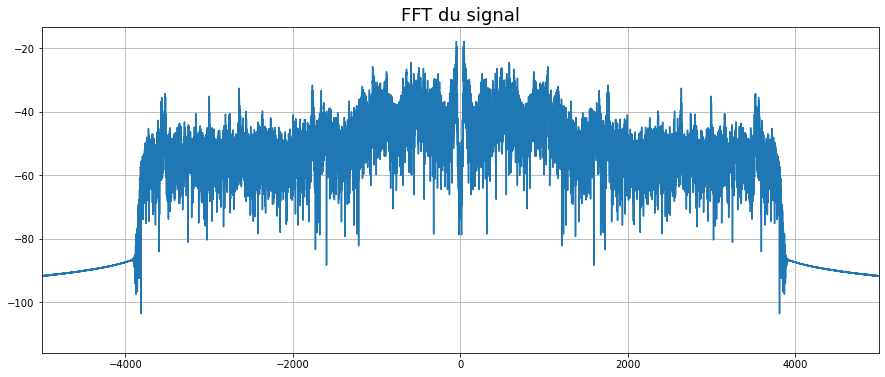

In [3]:
te = 1/fe
N=len(intervalle)
tfft=N*te
F = np.arange(-fe/2,fe/2,fe/N)


#FFT bilaterale du signal s. Avec le tfft/N on obtient, si on prend le module, la densité
#(répartition) spectrale (en fonction de la fréquence) de tension en Volt/Hz avec les mêmes
#valeurs que la transformée de Fourier
sin = tfft/N*np.fft.fftshift(np.fft.fft(intervalle))
#Module de S. On a alors la densité spectrale de tension en Volt/Hz
sin_mag = np.abs(sin)
#Densité spectrale de tension en Volt efficace/Hz
sin_eff=sin_mag/np.sqrt(2)
#Densité spectrale de puissance en dBm/Hz
sin_dBm=10*np.log10(np.square(sin_eff)/50*1000)

fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(F,sin_dBm)
ax.set_xlim([-5000,5000])

ax.set_title('FFT du signal' , fontsize=18)

ax.grid()

Nous constatons que la largeur de bande du signal audio coupe à environ **3800Hz**.

### Précisons la fréquence d’échantillonnage du signal audio et le nombre de bits de codage.

In [4]:
!sox --i "NR2.wav"


Input File     : 'NR2.wav'
Channels       : 1
Sample Rate    : 100000
Precision      : 16-bit
Duration       : 00:00:40.00 = 4000000 samples ~ 3000 CDDA sectors
File Size      : 8.00M
Bit Rate       : 1.60M
Sample Encoding: 16-bit Signed Integer PCM



La **fréquence d'échantillonnage** du signal audio est de **100 000Hz**.</br>
Le **nombre de bit de codage** des échantillons est de **16 bits**.</br>

###  Modélisons le signal modulé AM et nous allons prendre la transformée de Fourier de cette équation pour en déduire l'expression de la TF du signal modulé AM et expliquons pourquoi on parle de translation de fréquence.

La **modulation d'amplitude** consiste à faire varier l'amplitude d'un signal de fréquence élevée, **le signal porteur**, en fonction d'un signal de plus basse fréquence, **le signal modulant**. Ce dernier est celui qui contient l'information à transmettre (voix, par exemple, recueillie par un microphone).

On souhaite faire une translation de fréquence avec f0 = 10KHz.

Equation mathématique du signal modulé AM:

$AM(t)=x(t)*cos(2*\pi*10000*t)
-->(TF)--> AM(f) = \frac {1}{2}[(X(f+10000)+X(f-10000)]$

On parle de translation de fréquence car aprés modulation le signal est le même malgré le fait que sa plage de fréquence est différente.


### Créeons un programme pour créer le signal modulé AM. Réalisons une tranche du signal audio et du signal modulé AM (sur le même graphique) ainsi que leur Densité Spectrale de Puissance en dBm (en bilatéral). 


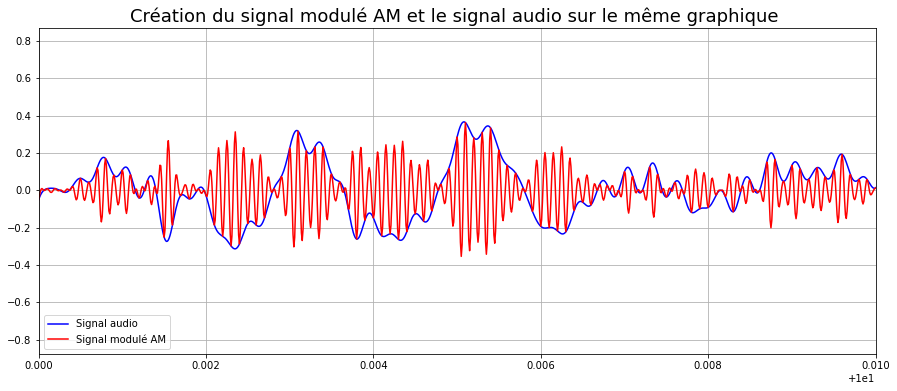

In [5]:
temps = np.arange(10, 12, 1/fe) #intervalle de la 10ème a la 12ème seconde par pas de 1/fe
intervalle = data[10*fe:12*fe] #on récupère la partie du signal audio entre la 10ème et la 12ème seconde
f0 = 10000
t = np.arange(10, 12, 1/fe)

AM = intervalle * np.cos(2*np.pi*f0*t) #Amplitude modulé
fig,ax = plt.subplots(figsize = (15,6))

ax.plot(t,intervalle, color='b', label="Signal audio")
ax.plot(t,AM, color='r', label="Signal modulé AM")
ax.grid()
ax.set_xlim([10,10.01])
ax.set_title('Création du signal modulé AM et le signal audio sur le même graphique ' , fontsize=18)
plt.legend(loc='lower left')


plt.show()

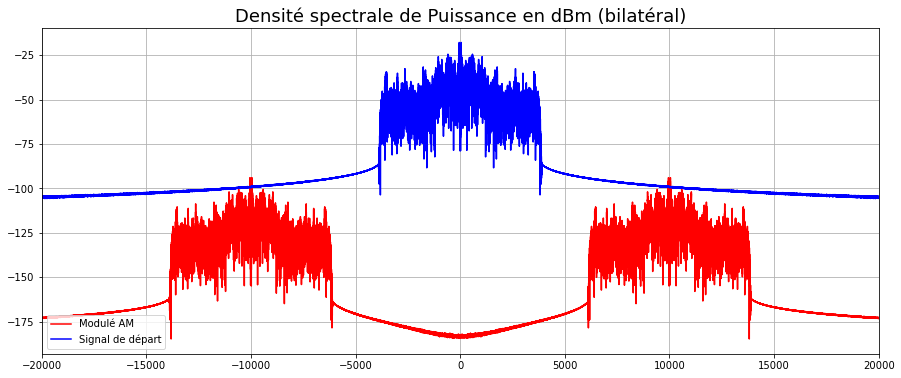

In [6]:
te = 1/fe
intervalle_D=intervalle*(np.cos(2*np.pi*f0*t))
N=len(intervalle_D)
tfft=N*te
F = np.arange(-fe/2,fe/2,fe/N)


#FFT bilaterale du signal s. Avec le tfft/N on obtient, si on prend le module, la densité
#(répartition) spectrale (en fonction de la fréquence) de tension en Volt/Hz avec les mêmes
#valeurs que la transformée de Fourier
SINUSOIDAL = tfft/N*np.fft.fftshift(np.fft.fft(intervalle_D))
#Module de S. On a alors la densité spectrale de tension en Volt/Hz
SINUSOIDAL_mag = np.abs(SINUSOIDAL)
#Densité spectrale de tension en Volt efficace/Hz
SINUSOIDAL_eff=SINUSOIDAL_mag/np.sqrt(2)
#Densité spectrale de puissance en dBm/Hz
SINUSOIDAL_dBm=10*np.log10(np.square(SINUSOIDAL_eff)/501000)

fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(F,SINUSOIDAL_dBm, color='r', label ="Modulé AM")
ax.plot(F,sin_dBm, color='b', label="Signal de départ")
ax.set_xlim([-20000,20000])
plt.legend(loc='lower left')

ax.set_title('Densité spectrale de Puissance en dBm (bilatéral)' , fontsize=18)
ax.grid()

# <font color="red"> II. Récepteur AM en simulation</font>


### Début de la création du programme du signal re-translater et visualisons une tranche de ce signal puis sa densité spectrale


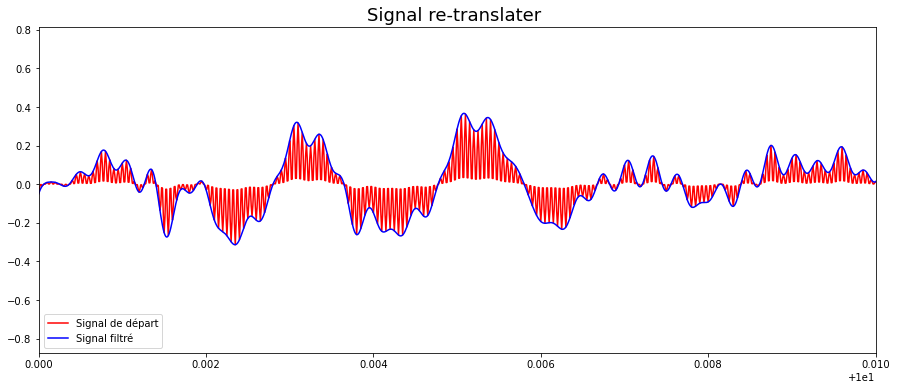

In [7]:
intervalle_DD = intervalle_D*(np.cos(2*np.pi*f0*t))
t = np.arange(10,12,1/fe)

fig, ax = plt.subplots(figsize = (15, 6))


ax.plot(t,intervalle_DD, color='r', label = "Signal de départ")
ax.plot(t,intervalle, color='b', label = "Signal filtré")
ax.set_xlim([10,10.01])
ax.set_title('Signal re-translater ' , fontsize=18)
plt.legend(loc='lower left')


plt.show()

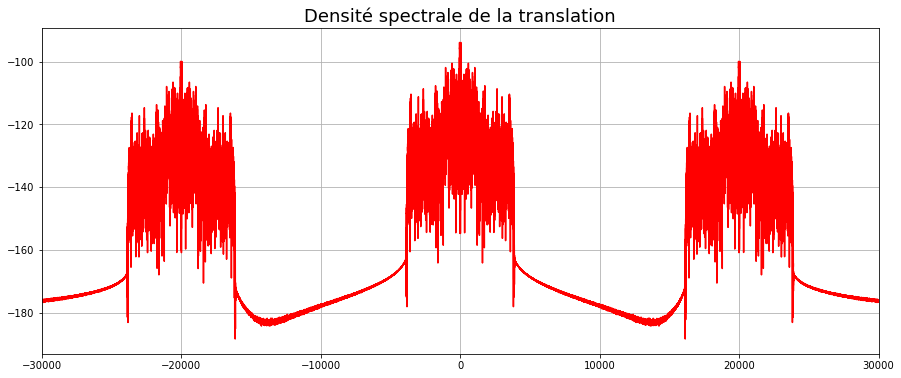

In [8]:
te = 1/fe
N=len(intervalle_DD)
tfft=N*te
F = np.arange(-fe/2,fe/2,fe/N)


#FFT bilaterale du signal s. Avec le tfft/N on obtient, si on prend le module, la densité
#(répartition) spectrale (en fonction de la fréquence) de tension en Volt/Hz avec les mêmes
#valeurs que la transformée de Fourier
SINUSOIDAL = tfft/N*np.fft.fftshift(np.fft.fft(intervalle_DD))
#Module de S. On a alors la densité spectrale de tension en Volt/Hz
SINUSOIDAL_mag = np.abs(SINUSOIDAL)
#Densité spectrale de tension en Volt efficace/Hz
SINUSOIDAL_eff=SINUSOIDAL_mag/np.sqrt(2)
#Densité spectrale de puissance en dBm/Hz
SINUSOIDAL_dBm=10*np.log10(np.square(SINUSOIDAL_eff)/501000)

fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(F,SINUSOIDAL_dBm, color='r')
ax.set_xlim([-30000,30000])

ax.set_title('Densité spectrale de la translation' , fontsize=18)
ax.grid()

### Effectuons l'opération pour récupérer le spectre du signal audio de départ



Si l'on veut récupérer le spectre du signal audio de départ, nous allons devoir effectuer l'opération : 𝑐𝑜𝑠(2∗𝜋∗2𝑓0∗𝑡) puis appliquer un filtre.


### Réalisations du programme :

In [9]:
import scipy.signal #Importation de la librairie scipy signal pour appliquer des filtres

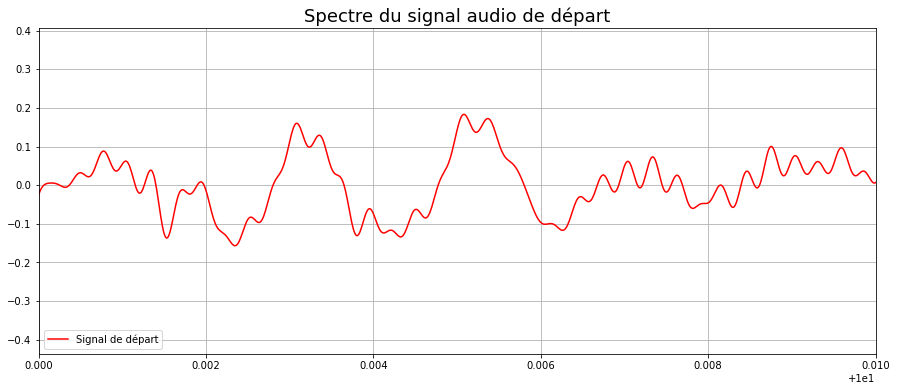

In [10]:
# Création de la figure 

t = np.arange(10,12, 1/fe)

fig, ax = plt.subplots(figsize = (15, 6))
ax.set_xlim([10,10.01])
ax.plot(t, 1/2*intervalle, color = 'r', label = "Signal de départ")
ax.grid()
ax.set_title('Spectre du signal audio de départ' , fontsize=18)
plt.legend(loc='lower left')


plt.show()

### Vérifions que l'on obtient bien le même signal. Visualisons aussi la DSP du signal démodulé.

In [11]:
# Création de notre filtre

nyquist = fe*0.5
fc = 5000
fcn = fc/nyquist
order = 8
b, a = scipy.signal.butter(order,fcn, btype = 'low', analog=False)
filtered = scipy.signal.lfilter(b, a, intervalle_DD)

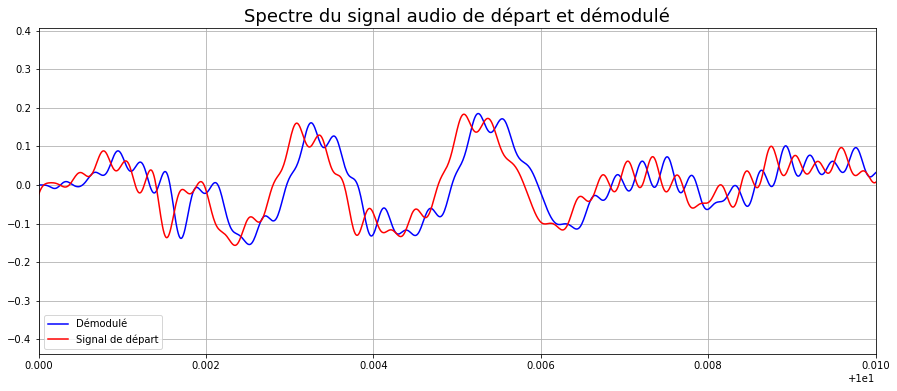

In [12]:
# Création de la figure 

t = np.arange(10,12, 1/fe)

fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(t,filtered, color = 'b', label="Démodulé")
ax.set_xlim([10,10.01])
ax.plot(t, 1/2*intervalle, color = 'r', label="Signal de départ");
ax.grid()
ax.set_title('Spectre du signal audio de départ et démodulé' , fontsize=18)
plt.legend(loc='lower left')
plt.show()

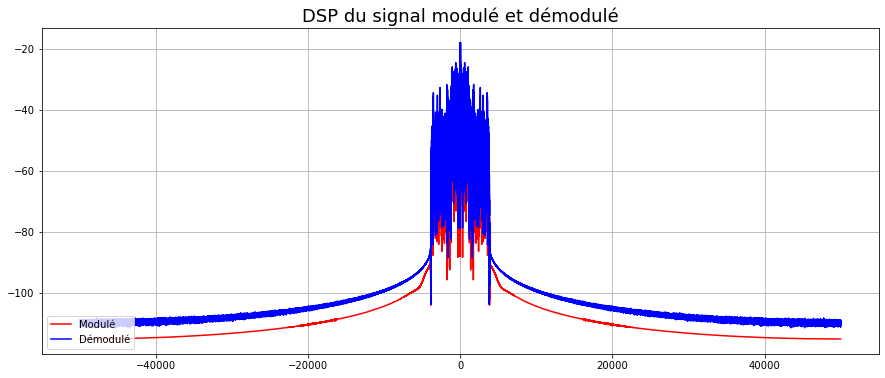

In [13]:
te = 1/fe
N=len(filtered)
tfft=N*te
F = np.arange(-fe/2,fe/2,fe/N)


#FFT bilaterale du signal s. Avec le tfft/N on obtient, si on prend le module, la densité
#(répartition) spectrale (en fonction de la fréquence) de tension en Volt/Hz avec les mêmes
#valeurs que la transformée de Fourier
SINUSF = tfft/N*np.fft.fftshift(np.fft.fft(filtered))
#Module de S. On a alors la densité spectrale de tension en Volt/Hz
SINUSF_mag = np.abs(SINUSF)
#Densité spectrale de tension en Volt efficace/Hz
SINUSF_eff=SINUSF_mag/np.sqrt(2)
#Densité spectrale de puissance en dBm/Hz
SINUSF_dBm=10*np.log10(np.square(SINUSF_eff)/50*1000)
fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(F,SINUSF_dBm, color='r', label = "Modulé")
ax.plot(F,sin_dBm, color='b', label = "Démodulé")
#ax.set_xlim([-10000,10000])
ax.set_title('DSP du signal modulé et démodulé' , fontsize=18)
plt.legend(loc='lower left')

ax.grid()

Nous visualisons bien que nous avons le même signal.

### Écoutons nos signaux filtrés et non filtrés :

In [14]:
import IPython.display as ipd

In [15]:
import soundfile as sf #Importation de la librairie soundfile

sf.write("NR2_10.wav", intervalle, fe) #tranche non filtré entre la 10 et la 12e s

In [16]:
IPython.display.Audio("NR2_10.wav")

NameError: name 'IPython' is not defined

In [ ]:
sf.write("NR2_filtre.wav", filtered, fe) #On filtre la tranche entre la 10 et la 12e s

In [ ]:
IPython.display.Audio("NR2_filtre.wav")

### Création du signal modulé avec une fréquence de 10 000 Hz et un signal démodulé de fréquence 10 000.1 Hz


In [ ]:
f_zeromod = 10000
f_zero_Demod = 10000.1
t = np.arange(0, 15, 1/fe)
intervalle_quinze = data[0*fe:15*fe]
Mod_signal=intervalle_quinze*(np.cos(2*np.pi*f_zeromod*t))
Demod_signal=Mod_signal*(np.cos(2*np.pi*f_zero_Demod*t))
Demod_filtered = scipy.signal.lfilter(b, a, Demod_signal)

In [ ]:
IPython.display.Audio("NR2.wav")

In [ ]:
sf.write("NR2_demodf.wav", Demod_filtered, fe) #On filtre la tranche entre la 10 et la 12e s
IPython.display.Audio("NR2_demodf.wav")

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(t,intervalle_quinze)
ax.grid()

#Affichage de la figure
plt.show()

fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(t,Demod_filtered)
ax.grid()

#Affichage de la figure
plt.show()

### Création du code pour emettre un stream audio avec sounddevice.

In [ ]:
# EMETTONS LA MUSIQUE

#Importations des librairies
import sounddevice as sd
import soundfile as sf
import threading

# Création du thread (unité d'exécution d'un processus)
event = threading.Event()
try:
    data, fs = sf.read('NR2.wav', always_2d=True)
    current_frame = 0
    
    def callback(outdata, frames, time, status):
        global current_frame
        if status:
            print(status)
        chunksize = min(len(data) - current_frame, frames)
        audio = data[current_frame:current_frame + chunksize]
        outdata[:] = audio
        if chunksize < frames:
            outdata[chunksize:] = 0
            raise sd.CallbackStop()
        current_frame += chunksize
        
    stream = sd.OutputStream(samplerate=fs, callback=callback, finished_callback=event.set)
    
    with stream:
        event.wait()
except KeyboardInterrupt:
    exit('\n Interrupted by user')

**Désormais, nous allons brancher un USB audio stereo sur les deux pc, puis brancher en haut-parleur le pc émetteur et en microphone le pc récepteur.**

**Puis, nous allons rédiger le code pour le pc récepteur afin que nous puissions écouter le stream via le casque audio connecté sur l'adaptateur.**

In [ ]:
#Reception du signal
fs = 100000

def callback(indata, outdata, frames, time, status):
    if status:
        print(status)
    outdata[:] = indata
stream = sd.Stream(samplerate=fs, callback=callback)
try:
    with stream:
        print('#' * 80)
        print('press Return to quit')
        print('#' * 80)
        input()
except KeyboardInterrupt:
    exit('')

### Filtre En temps réel

In [ ]:
    #Filtrage en temps réel
fs = 100000
fc = 1000
nyquist = 0.5 * fs
fc1 = 1000
fcn1 = fc1 / nyquist

coef_sos = scipy.signal.butter(1, fcn1, btype='lowpass', analog = False, output = 'sos')

zi = scipy.signal.sosfilt_zi(coef_sos)

def callback(indata, outdata, frames, time, status):
    global zi
    signal = indata[:,0] #Récupération du morceau chunk du signal.
    signal_filtre, zi = scipy.signal.sosfilt(coef_sos, signal, zi=zi) #filtrage du chunk

    if status :
        print(status)
    outdata[:]= signal_filtre[:,np.newaxis]

stream = sd.Stream(samplerate=fs, callback=callback, channels=1)
try:
    with stream:
        print('#' * 80)
        print('press Return to quit')
        print('#' * 80)
        input()
except KeyboardInterrupt:
    exit('')
 

## Modulé AM

In [29]:
# EMETTONS LA MUSIQUE

#Importations des librairies
import sounddevice as sd
import soundfile as sf
import threading

t = np.arange(0,40, 1/fe)

AM = data * np.cos(2*np.pi*f0*t) #Amplitude modulé
sf.write("NR2_AM.wav", AM, fe) #On enregistre dans un nouveau fichier le contenu de l'audio NR2
event = threading.Event()


try:
    data, fs = sf.read('NR2_AM.wav', always_2d=True)
    current_frame = 0
    
    def callback(outdata, frames, time, status):
        global current_frame
        if status:
            print(status)
        chunksize = min(len(data) - current_frame, frames)
        audio = data[current_frame:current_frame + chunksize]
        outdata[:] = audio
        if chunksize < frames:
            outdata[chunksize:] = 0
            raise sd.CallbackStop()
        current_frame += chunksize
        
    stream = sd.OutputStream(samplerate=fs, callback=callback, finished_callback=event.set)
    
    with stream:
        event.wait()
except KeyboardInterrupt:
    exit('\n Interrupted by user')
    

Exception ignored from cffi callback <function _StreamBase.__init__.<locals>.callback_ptr at 0x000002164DDD9C10>:
Traceback (most recent call last):
  File "C:\Users\maxence\anaconda3\lib\site-packages\sounddevice.py", line 856, in callback_ptr
    return _wrap_callback(callback, data, frames, time, status)
  File "C:\Users\maxence\anaconda3\lib\site-packages\sounddevice.py", line 2681, in _wrap_callback
    callback(*args)
  File "C:\Users\maxence\AppData\Local\Temp/ipykernel_11936/428792082.py", line 26, in callback
ValueError: could not broadcast input array from shape (2048,1) into shape (2576,2)
